In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
names1880=pd.read_csv('../datasets/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [6]:
# 2024 is the last available year as of now
years=range(1880,2025)

pieces=[]
columns=['name','sex','births']

for year in years:
    path='../datasets/names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)

    frame['year']=year
    pieces.append(frame)

names=pd.concat(pieces,ignore_index=True)

In [7]:
names.shape

(2149477, 4)

In [8]:
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
names.tail(10)

,name,sex,births,year
2149467,Zyah,M,5,2024
2149468,Zyer,M,5,2024
2149469,Zyhaire,M,5,2024
2149470,Zyheem,M,5,2024
2149471,Zyloh,M,5,2024
2149472,Zylyn,M,5,2024
2149473,Zymiere,M,5,2024
2149474,Zypher,M,5,2024
2149475,Zyre,M,5,2024
2149476,Zyrell,M,5,2024


In [11]:
names.to_csv('../datasets/names/names.csv', index=False)

In [13]:
name_s=pd.read_csv('../datasets/names/names.csv')
name_s.head(5)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [15]:
name_s.shape

(2149477, 4)

In [17]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2020,1615512,1725065
2021,1639712,1748237
2022,1638762,1744373
2023,1602645,1708551
2024,1613188,1715313


In [19]:
total_birth=pd.pivot_table(name_s,values='births',index='year',columns='sex',aggfunc='sum')
total_birth.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112321,104625
1884,129019,114442


<Axes: title={'center': 'Total births by sex (1880-2024)'}, xlabel='year'>

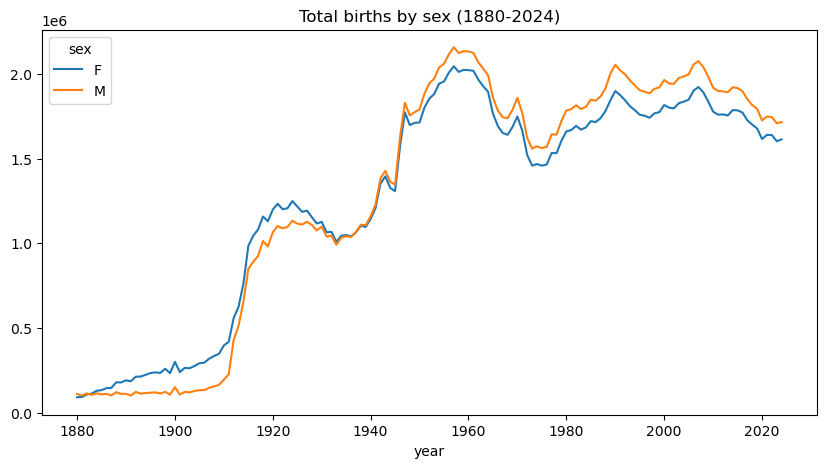

In [21]:
total_births.plot(title='Total births by sex (1880-2024)', figsize=(10,5))

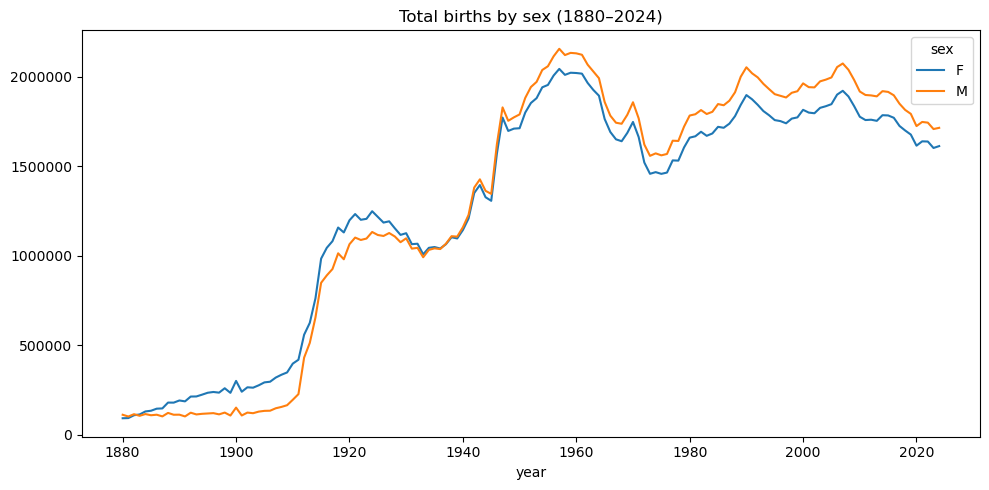

In [22]:
import matplotlib.ticker as ticker

ax = total_births.plot(title="Total births by sex (1880–2024)", figsize=(10, 5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()